In [49]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
filepath= r'C:\Users\jflan\Downloads\1520467485_dsc_human_temp\EDA_human_temperature\data\human_body_temperature.csv'

In [50]:
df=pd.read_csv(filepath)

In [51]:
#checking the length. Checking sample size
print(len(df))

130


In [52]:
print(df.keys())

Index(['temperature', 'gender', 'heart_rate'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCED6B7240>]],
      dtype=object)

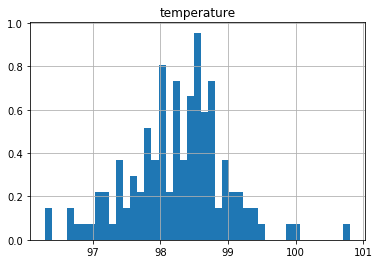

In [53]:
#Exploring the dataset. It looks like the mean temperature should be about 98
#The distribution looks normal
df.hist(column='temperature',bins=43,density=True)

In [54]:
#lets look at the mean and standard distribution
temps=df.temperature.sort_values()
mean,std =temps.mean(),temps.std()
print(mean,std)

98.24923076923076 0.7331831580389453


In [55]:
#Let's confirm that normal distribution. It looks like the pvalue is >.05
#therefore it's normally distributed
p=scipy.stats.normaltest(temps)
print(p)

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)


In [56]:
#let's work on getting a t score just for fun
median=df.temperature.median()
sample_size=df.temperature.size
top=mean-98.9
bottom=std/(sample_size**0.5)
t_score=top/bottom
print(t_score)

-10.120132687149733


In [57]:
#OK, now let's do a z test as the sample size is greater than 30. It will be 1-sample as st dev is not known
z,p_val= ztest(x1=df['temperature'],value=98.6)
print(z,p_val)


-5.4548232923645195 4.9021570141012155e-08


In [58]:
#looks like the null hyphothesis can be rejected as p_val 4.8e^-8< 0.05
#Lets look at the sample for 10 random people. I will do both a z and t test for a sample size10
sample10=np.random.choice(df['temperature'],size=10)

In [59]:
t,p_t= ttest_1samp(sample10,98.6)
print(t,p_t)

-1.7900979375076453 0.10705444841606504


In [60]:
#looks like the p value was greater than .05 so it's not significant. Time to do a z test
z10,p_z=ztest(x1=sample10,value=98.6)
print(z10,p_z)

-1.7900979375076453 0.07343816832237221


In [61]:
#it looks like both were bad but the z test was slightly lower at .609

In [62]:
#what temperature is abnormal? Let's find what is below and above a 95% confidence inteval
#is, meaning mean +- 1.96 x the standard deviation. Both are calculated above
print(std)
print(mean)

0.7331831580389453
98.24923076923076


In [63]:
print("upper limit is", mean+std*1.96)
print("lower limit is", mean-std*1.96)
print("anything above or below the above temperatures is abnormal")

upper limit is 99.6862697589871
lower limit is 96.81219177947443
anything above or below the above temperatures is abnormal


In [71]:
#is there a significant difference between male and females in normal temperature?
female= df.loc[df['gender']=='F','temperature']
male= df.loc[df['gender']=='M','temperature']

In [72]:
#Let's run a two sample t test because we are comparing the difference of two groups and the population std dev is unknown
t_fm,p_fm = ttest_ind(male,female)
print(t_fm,p_fm)

-2.2854345381656103 0.02393188312239561


In [ ]:
#yes! it looks like we can reject our null hypothesis that there is no difference as the p value is less than .05!

#conclusion we can see that the true mean was different than the original mean we had been provided, meaning difference populations can vary
#We also found that we should be cautious with patients who's temperature fall outside the 95 percent confidence interval that we established
#Since there is a stastical difference in the groups of female and male patients we should take a difference approach based on the sex of the patient
